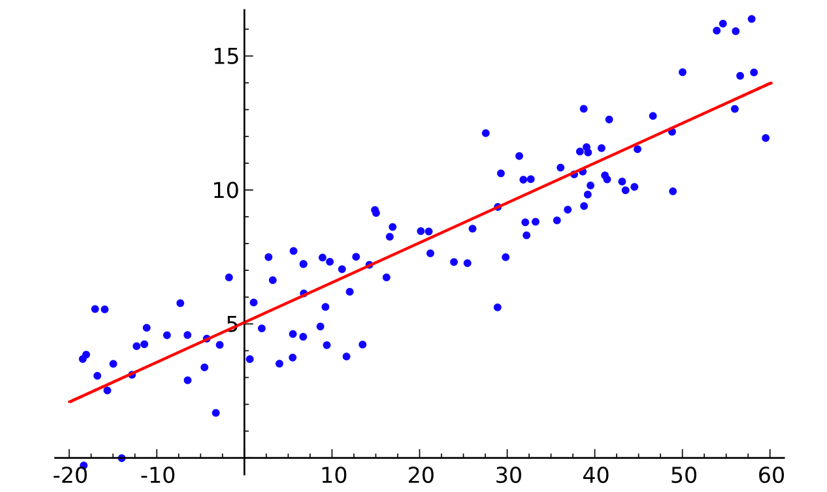

## CML1 Project: Linear Models 
*Mathias Schindler*

In [28]:
#Preamble
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sklearn

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/CML1_Projects/Data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Inspection & Preparation

In [169]:
#Load data
train_raw = pd.read_csv("Regression_Supervised_Train.csv")
test_raw = pd.read_csv("Regression_Supervised_Test_updated.csv")
print(train_raw.head(10))
print(test_raw.head(10))

      lotid  logerror  ... taxdelinquencyyear  mypointer
0  17214744       NaN  ...                NaN      25711
1  12018724       NaN  ...                NaN      13268
2  11306699       NaN  ...               11.0       5423
3  11047729       NaN  ...                NaN      26198
4  17174848       NaN  ...                NaN      25187
5  14305657       NaN  ...                NaN       6066
6  11016338       NaN  ...                NaN       4138
7  13961339       NaN  ...                NaN       4706
8  11671803       NaN  ...                NaN       5706
9  11150386       NaN  ...                NaN      13350

[10 rows x 48 columns]
      lotid  logerror  ... taxdelinquencyflag  taxdelinquencyyear
0  11614222       NaN  ...                NaN                 NaN
1  11555888       NaN  ...                NaN                 NaN
2  13052987       NaN  ...                NaN                 NaN
3  12448473       NaN  ...                NaN                 NaN
4  12559155       N

I begin with removing the features 'totaltaxvalue', 'buildvalue' or 'landvalue' from the training and test dataset, and also 'mypointer' from the training set as specified in the instructions. \\
Then I remove features with >40% missing data. And rows with missing data.

In [154]:
def make_nan_fig(df, title):
  nan_df = df.isnull().sum()/len(df)*100
  nan_df = nan_df.sort_values(ascending = False)

  nan_df_fig = plt.bar(nan_df.index, nan_df.values)
  plt.xticks(rotation='vertical', fontsize = 12)
  plt.ylabel('% NaN', fontsize = 12)
  plt.hlines(y=40, xmin= 0, xmax = 40, linestyle = 'dashed')
  plt.title('NaN data in ' + title + ' dataset as proportion of total observations')
  fig = plt.gcf()
  fig.set_size_inches(18, 5)
  plt.show()
  return nan_df_fig


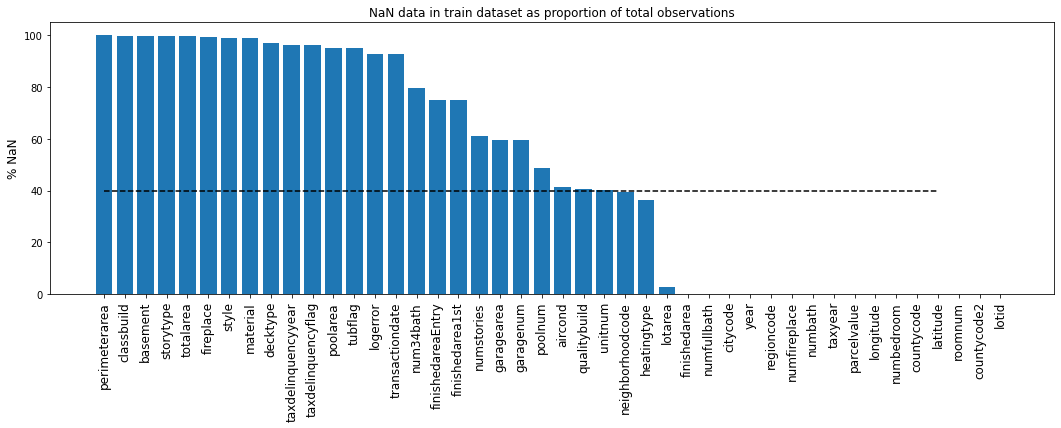

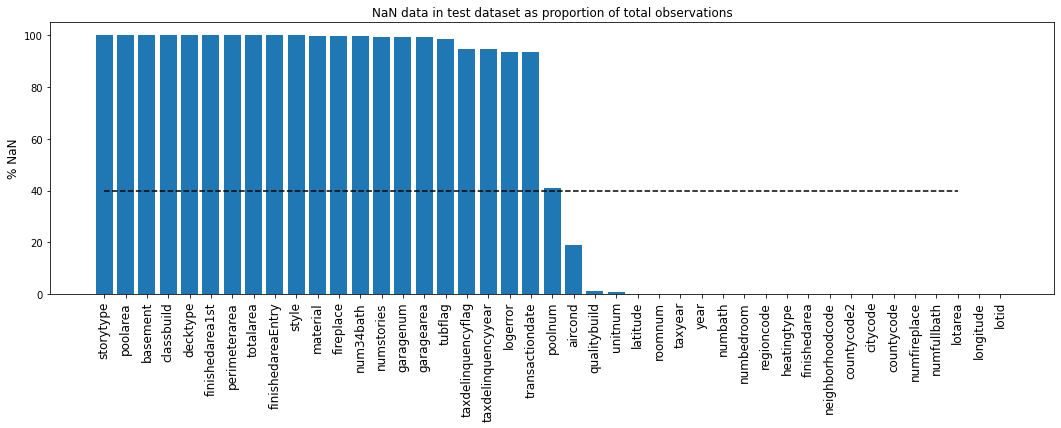

<BarContainer object of 43 artists>

In [170]:
del_feats = ["totaltaxvalue", "buildvalue", "landvalue", "mypointer"]
train_clean = train_raw.drop(del_feats, axis = 1)
test_clean = test_raw.drop(del_feats[0:3], axis = 1)

# Inspect missing data
make_nan_fig(train_clean, "train")
make_nan_fig(test_clean, "test")

So, there is a substantial amount of missing data in both the training and testing dataset. In the training data set we see, that there are 3 variables just over the threshold of 40%. 

In [171]:
# Remove features w. >40% NaN
mypct = 0.6
train_clean = train_clean.dropna(axis = 1, thresh = round(mypct*len(train_clean.index)))
test_clean = test_clean.dropna(axis = 1, thresh = round(mypct*len(test_clean.index)))

# Remove rows w. any NaN
train_clean = train_clean.dropna(axis = 0)
print(test_clean.isnull().sum()) #Features 'aircond', 'qualitybuild', 'unitnum' contain NaN in test

lotid                 0
aircond             526
numbath               0
numbedroom            0
qualitybuild         38
finishedarea          0
countycode            0
numfireplace          0
numfullbath           0
heatingtype           0
latitude              0
longitude             0
lotarea               0
citycode              0
countycode2           0
neighborhoodcode      0
regioncode            0
roomnum               0
unitnum              19
year                  0
taxyear               0
dtype: int64


In [172]:
# Check difference in columns
train_cols = train_clean.columns
test_cols = test_clean.columns
print(train_cols.difference(test_cols))
print(test_cols.difference(train_cols)) #Train data set does not contain 'aircond', 'qualitybuild', 'unitnum', so remove

Index(['parcelvalue'], dtype='object')
Index(['aircond', 'qualitybuild', 'unitnum'], dtype='object')


In [173]:
del_feats_test = ['aircond', 'qualitybuild', 'unitnum']
test_clean = test_clean.drop(del_feats_test, axis = 1)
print(test_clean.shape)
print(test_clean.columns)

(2746, 18)
Index(['lotid', 'numbath', 'numbedroom', 'finishedarea', 'countycode',
       'numfireplace', 'numfullbath', 'heatingtype', 'latitude', 'longitude',
       'lotarea', 'citycode', 'countycode2', 'neighborhoodcode', 'regioncode',
       'roomnum', 'year', 'taxyear'],
      dtype='object')


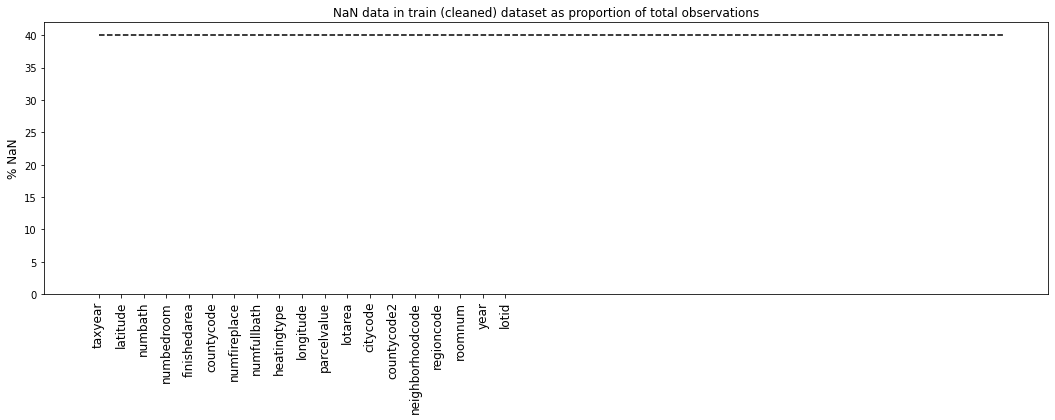

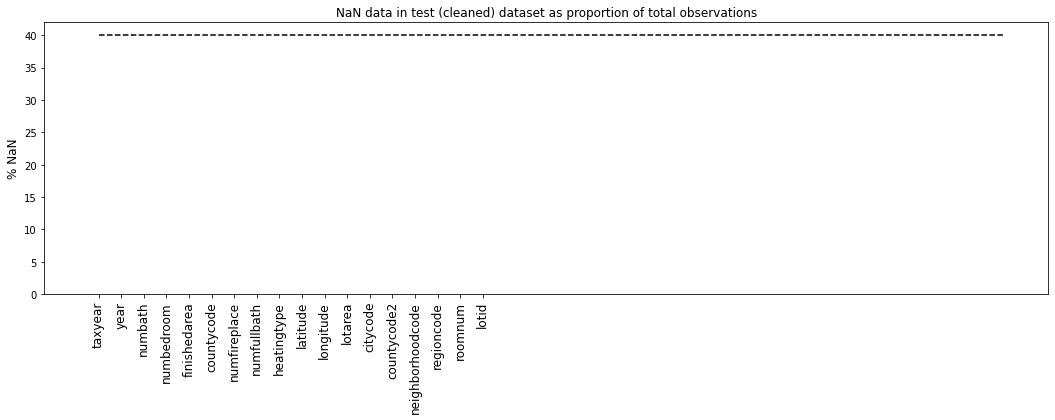

<BarContainer object of 18 artists>

In [177]:
# Inspecting resulting dataframes
make_nan_fig(train_clean, "train (cleaned)")
make_nan_fig(test_clean, "test (cleaned)")
# No missing values in resulting dataframes.

# **Producing Predictions**